In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

In [3]:
a=pd.read_csv(r"C:\\Users\\hp pc\\gl-practice sets\\RECsYS-PROJECT\\phone_user_review_file_1.csv",encoding='latin1')
a.shape

(374910, 11)

In [4]:
b=pd.read_csv(r"C:\\Users\\hp pc\\gl-practice sets\\RECsYS-PROJECT\\phone_user_review_file_2.csv",encoding='latin1')
b.shape

(114925, 11)

In [5]:
c=pd.read_csv(r"C:\\Users\\hp pc\\gl-practice sets\\RECsYS-PROJECT\\phone_user_review_file_3.csv",encoding='latin1')
c.shape

(312961, 11)

In [6]:
d=pd.read_csv(r"C:\\Users\\hp pc\\gl-practice sets\\RECsYS-PROJECT\\phone_user_review_file_4.csv",encoding='latin1')
d.shape

(98284, 11)

In [7]:
e=pd.read_csv(r"C:\\Users\\hp pc\\gl-practice sets\\RECsYS-PROJECT\\phone_user_review_file_5.csv",encoding='latin1')
e.shape

(350216, 11)

In [8]:
f=pd.read_csv(r"C:\\Users\\hp pc\\gl-practice sets\\RECsYS-PROJECT\\phone_user_review_file_6.csv",encoding='latin1')
f.shape

(163837, 11)

In [9]:
df= pd.concat([a,b,c,d,e,f], axis=0)

In [10]:
df.iloc[8691]

phone_url                  /cellphones/samsung-galaxy-s7-edge/
date                                                 5/25/2016
lang                                                        en
country                                                     us
source                                                 Samsung
domain                                             samsung.com
score                                                      9.2
score_max                                                   10
extract      Expensive option, but you get a lot for your m...
author                                               Pickle15 
product                   Samsung Galaxy S7 edge 32GB (Sprint)
Name: 8691, dtype: object

In [11]:
df['score']=round(df['score'])

In [12]:
df['score'].unique()
#no outliers in score values

array([10.,  6.,  9.,  4.,  8.,  2.,  7.,  5., nan,  3.,  1.,  0.])

In [13]:
df.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [14]:
df=df[df['product'].notna()]

        

In [15]:
df.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63201
product          0
dtype: int64

In [16]:
#dropping rows that have no extracts
df=df[df.extract.notna()]
df=df[df.author.notna()]

In [17]:
df.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        60499
score_max    60499
extract          0
author           0
product          0
dtype: int64

In [18]:
df['product'] = df['product'].str.replace(' ', '')
    
    
        

In [19]:
df.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

In [20]:
df.duplicated().any()

True

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().any()

False

In [23]:
df1_sampled= df.sample(n=100000,random_state=612)

In [24]:
df1=df1_sampled.copy()

In [25]:
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder = LabelEncoder()  

df1['lang_code'] = labelencoder.fit_transform(df1['lang']) # returns label encoded variable(s)

In [26]:

df1['product_code'] = labelencoder.fit_transform(df1['product'])
df1['country_code'] = labelencoder.fit_transform(df1['country'])
df1['source_code'] = labelencoder.fit_transform(df1['source'])
df1['domain_code'] = labelencoder.fit_transform(df1['domain'])
df1['author_code'] = labelencoder.fit_transform(df1['author'])
df1['phone_url_code'] = labelencoder.fit_transform(df1['phone_url'])

In [27]:
df2=pd.DataFrame(df1[['score','lang_code','phone_url_code','product_code','country_code','source_code','domain_code','author_code']])

In [28]:
df2.isna().sum()

score             4484
lang_code            0
phone_url_code       0
product_code         0
country_code         0
source_code          0
domain_code          0
author_code          0
dtype: int64

In [29]:
df2.shape

(100000, 8)

In [30]:
df2.columns

Index(['score', 'lang_code', 'phone_url_code', 'product_code', 'country_code',
       'source_code', 'domain_code', 'author_code'],
      dtype='object')

In [31]:
df1_sampled.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [32]:
import numpy as np
from sklearn.impute import KNNImputer

In [33]:
imputer = KNNImputer(n_neighbors=2)
df2=imputer.fit_transform(df2)
df2=pd.DataFrame(df2,columns=['score', 'lang_code', 'phone_url_code', 'product_code', 'country_code','source_code', 'domain_code', 'author_code'])

In [34]:
df2.isna().sum()

score             0
lang_code         0
phone_url_code    0
product_code      0
country_code      0
source_code       0
domain_code       0
author_code       0
dtype: int64

In [35]:
df1_sampled.shape

(100000, 11)

In [36]:
final_df1=pd.DataFrame(df1_sampled[['author','product']])
final_df2=pd.DataFrame(df2[['score']])
final_df2.shape


(100000, 1)

In [37]:
new_index=range(0,100000)
final_df1.index=new_index
final_df1

,author,product
0,Kdotj15,SamsungGalaxyS7edge32GB(Sprint)
1,Cliente Amazon,"AsusZE551ML-2A760WWSmartphoneZenFone2Deluxe,5...."
2,ron,×××¤×××¡××××¨×HuaweiMateS32GB
3,katha_maria93,SonyEricssonW395blushtitaniumHandy
4,paul george,AppleiPhone3G8GBSIM-Free-Black
...,...,...
99995,Ozzie1970,SamsungGalaxyS6wit/32GB
99996,Naina Sharma,AppleiPhone3Gs8GB-Black
99997,Mister Quindi (youtube),"HuaweiMate832GB4GBlack-smartphones(DualSIM,And..."
99998,Sarah L.,"SamsungGalaxyAceS5830Smartphone(8,9cm(3,5Zoll)..."


In [38]:
fi_df=final_df1.join(final_df2,how='outer')
fi_df.isna().sum()


author     0
product    0
score      0
dtype: int64

In [39]:
fi_df.shape

(100000, 3)

In [40]:
#fi_df=fi_df.sample(n=5000,random_state=7)
#new_index2=range(0,5000)
#fi_df.index=new_index2
#fi_df

In [41]:
fi_df

,author,product,score
0,Kdotj15,SamsungGalaxyS7edge32GB(Sprint),10.0
1,Cliente Amazon,"AsusZE551ML-2A760WWSmartphoneZenFone2Deluxe,5....",10.0
2,ron,×××¤×××¡××××¨×HuaweiMateS32GB,10.0
3,katha_maria93,SonyEricssonW395blushtitaniumHandy,8.0
4,paul george,AppleiPhone3G8GBSIM-Free-Black,2.0
...,...,...,...
99995,Ozzie1970,SamsungGalaxyS6wit/32GB,9.0
99996,Naina Sharma,AppleiPhone3Gs8GB-Black,8.0
99997,Mister Quindi (youtube),"HuaweiMate832GB4GBlack-smartphones(DualSIM,And...",10.0
99998,Sarah L.,"SamsungGalaxyAceS5830Smartphone(8,9cm(3,5Zoll)...",10.0


### products with top most rating

In [42]:
fi_df.loc[fi_df['score']==10]

,author,product,score
0,Kdotj15,SamsungGalaxyS7edge32GB(Sprint),10.0
1,Cliente Amazon,"AsusZE551ML-2A760WWSmartphoneZenFone2Deluxe,5....",10.0
2,ron,×××¤×××¡××××¨×HuaweiMateS32GB,10.0
5,Beautygloz,Applesmartphone:iPhone5s-Goud,10.0
6,stephensca,SamsungGalaxyS732GB(Verizon),10.0
...,...,...,...
99987,lyesmerriout,LGNexus4,10.0
99990,ÐÐµÐ½Ð¸Ñ,AppleiPhone5s16GB(ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹),10.0
99991,suhanova.liza,Nokia7310Supernova,10.0
99997,Mister Quindi (youtube),"HuaweiMate832GB4GBlack-smartphones(DualSIM,And...",10.0


### Distribution of ratings across products

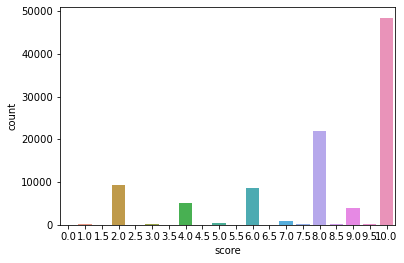

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=fi_df , x='score')
plt.show()

### Users who have given more than 500 ratings

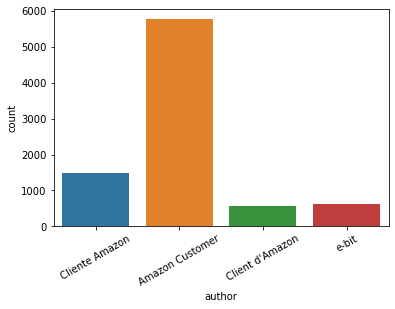

In [44]:
counts1 = pd.value_counts(fi_df['author'])
a=fi_df[fi_df['author'].isin(counts1[counts1 >= 500].index)]['author']
a=pd.DataFrame(a,columns=['author'])
a['score']=fi_df[fi_df['author'].isin(counts1[counts1 >= 110].index)]['score']
a['product']=fi_df[fi_df['author'].isin(counts1[counts1 >= 110].index)]['product']
sns.countplot(data=a , x='author')
plt.xticks(rotation=30)

plt.show()

### Products that have more than 200 ratings in 100,000 values

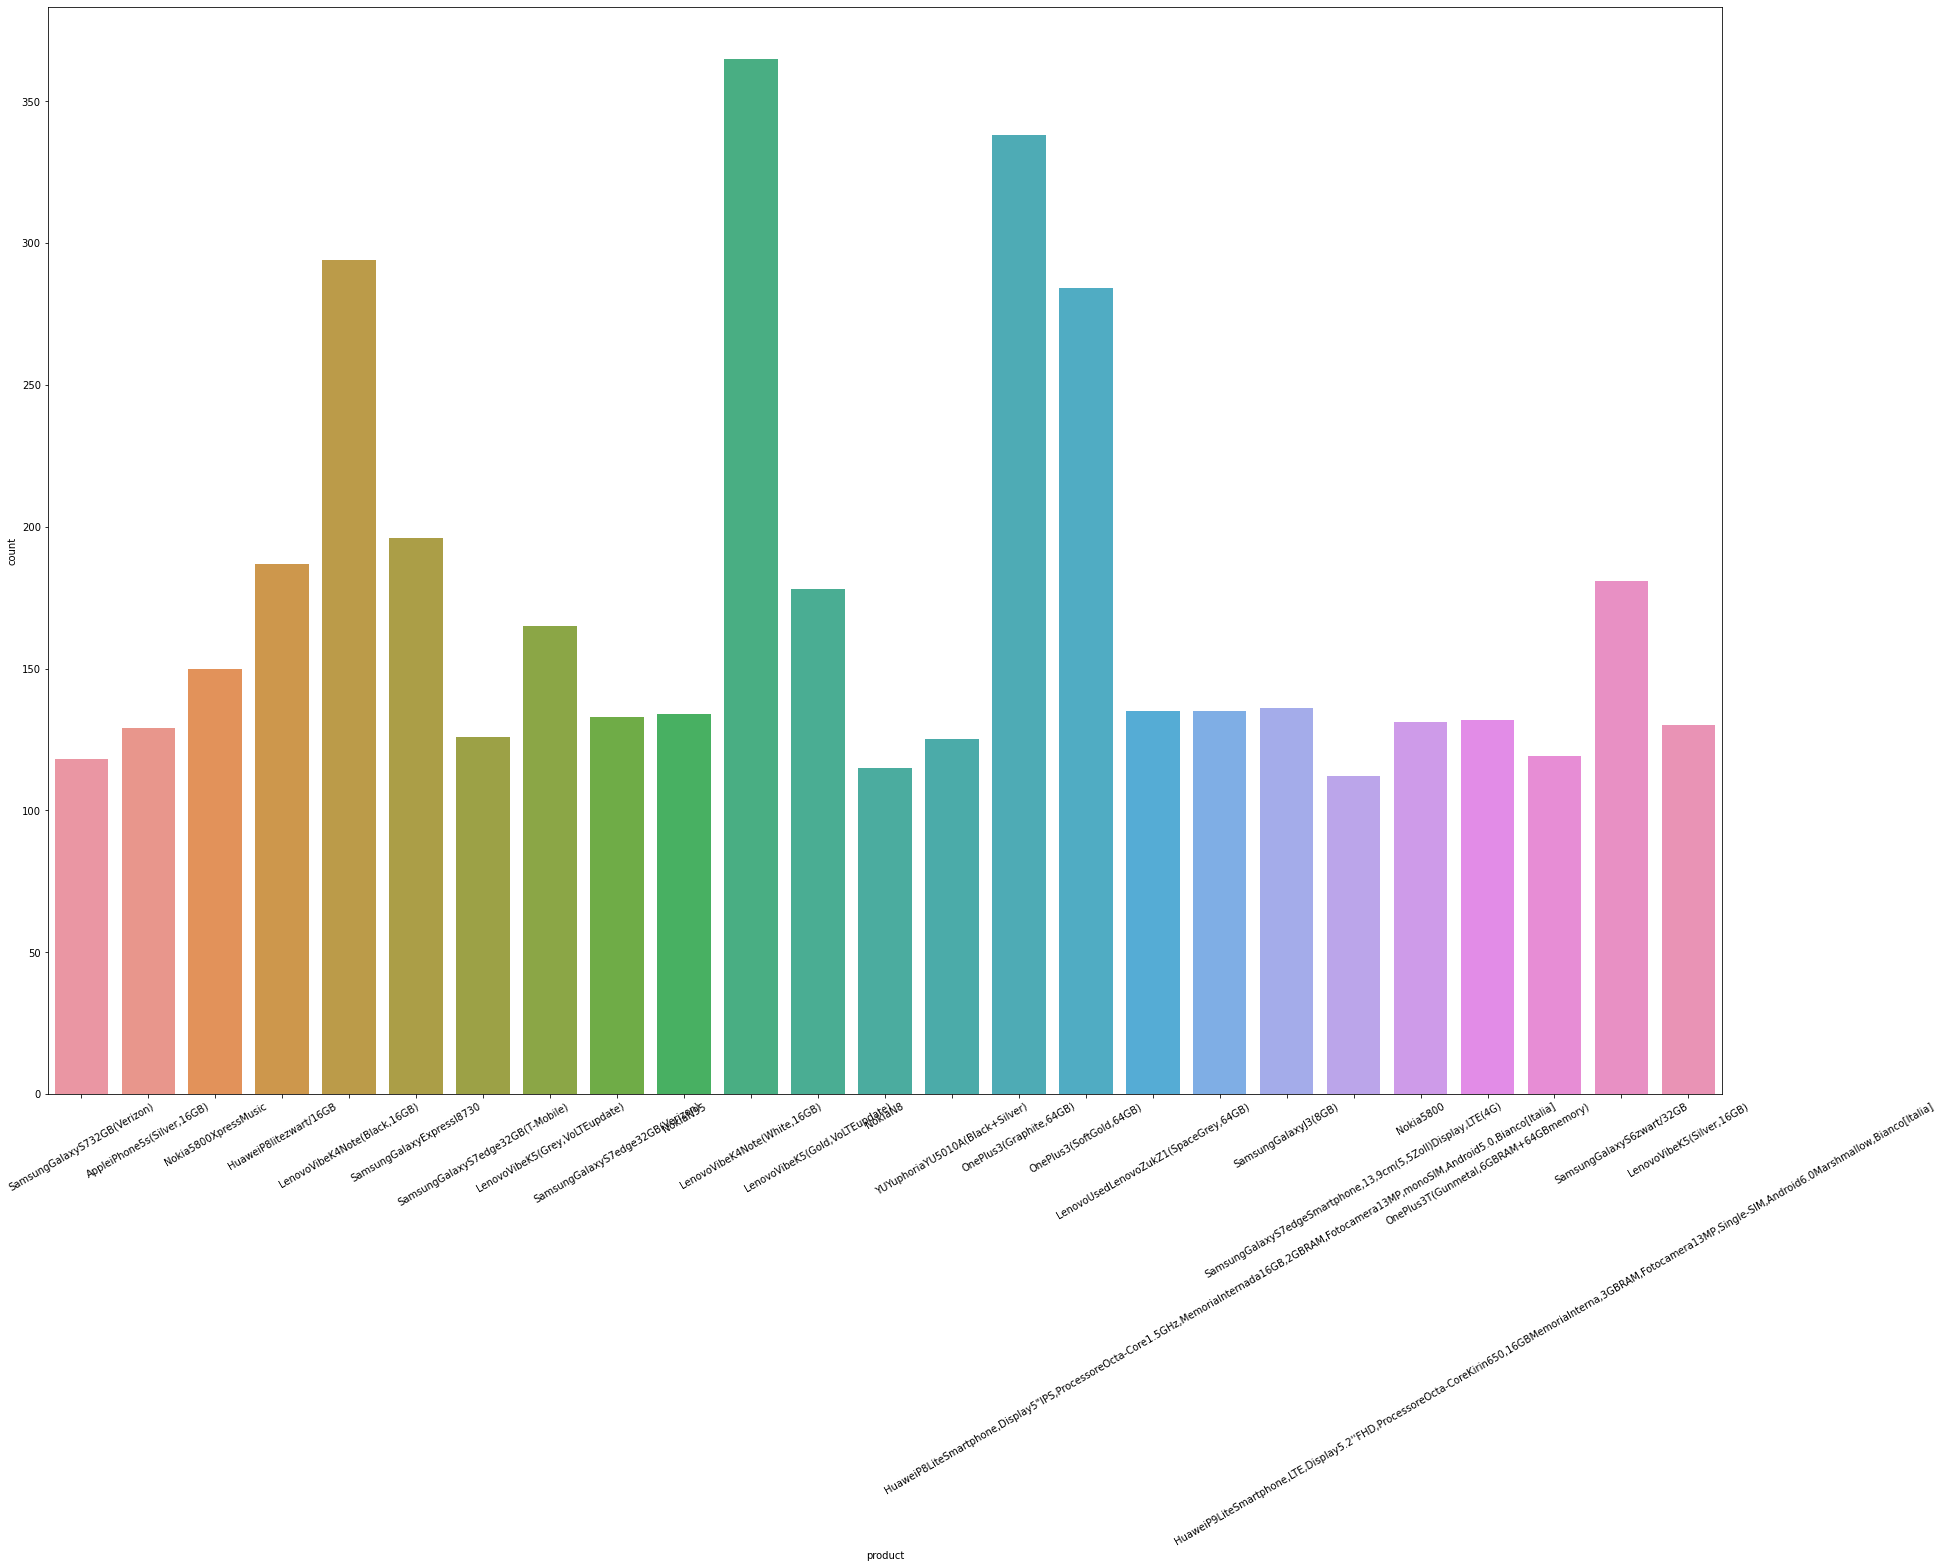

In [45]:
counts2 = pd.value_counts(fi_df['product'])
b=fi_df[fi_df['product'].isin(counts2[counts2 >= 110].index)]

b=pd.DataFrame(b,columns=['product'])
b['score']=fi_df[fi_df['product'].isin(counts2[counts2 >= 110].index)]['score']
b['author']=fi_df[fi_df['product'].isin(counts2[counts2 >= 110].index)]['author']
plt.figure(figsize=(30,20))
sns.countplot(data=b , x='product')
plt.xticks(rotation=30)
plt.show()
#counts2

In [46]:
a.shape
a

,author,score,product
1,Cliente Amazon,10.0,"AsusZE551ML-2A760WWSmartphoneZenFone2Deluxe,5...."
15,Amazon Customer,2.0,"AppleiPhone5s(Silver,16GB)"
30,Client d'Amazon,8.0,AukruChargeurdebatterieadaptateurPourSamsungGa...
43,Amazon Customer,8.0,"MotorolaMotoG3rdGeneration(Black,16GB)"
54,Amazon Customer,10.0,"LenovoVibeX3(White,32GB)"
...,...,...,...
99936,Amazon Customer,2.0,LGG3BeatLG-D7228GBUnlockedGSM4GLTEQuad-CoreAnd...
99937,Amazon Customer,10.0,"LenovoVibeK5(Silver,16GB)"
99948,Amazon Customer,10.0,"MotorolaMotoG3rdGeneration(Black,16GB)"
99984,Amazon Customer,10.0,"LenovoVibeK5(Gold,VoLTEupdate)"


In [47]:
b.shape
b

,product,score,author
6,SamsungGalaxyS732GB(Verizon),10.0,stephensca
15,"AppleiPhone5s(Silver,16GB)",2.0,Amazon Customer
98,Nokia5800XpressMusic,8.0,Fillipin
100,HuaweiP8litezwart/16GB,7.0,RenÃ©
122,"LenovoVibeK4Note(Black,16GB)",4.0,Amazon Customer
...,...,...,...
99910,"LenovoVibeK5(Gold,VoLTEupdate)",4.0,Parth Ranjan
99925,SamsungGalaxyExpressI8730,9.0,dik1609
99937,"LenovoVibeK5(Silver,16GB)",10.0,Amazon Customer
99984,"LenovoVibeK5(Gold,VoLTEupdate)",10.0,Amazon Customer


### Intersection of users who rated 500 or more products and products that got 200 or more ratings

In [48]:
c = a.join(b, how='inner',lsuffix='_l',rsuffix='_r')
c

,author_l,score_l,product_l,product_r,score_r,author_r
15,Amazon Customer,2.0,"AppleiPhone5s(Silver,16GB)","AppleiPhone5s(Silver,16GB)",2.0,Amazon Customer
122,Amazon Customer,4.0,"LenovoVibeK4Note(Black,16GB)","LenovoVibeK4Note(Black,16GB)",4.0,Amazon Customer
216,Amazon Customer,6.0,"LenovoVibeK5(Grey,VoLTEupdate)","LenovoVibeK5(Grey,VoLTEupdate)",6.0,Amazon Customer
290,Amazon Customer,10.0,"LenovoVibeK4Note(White,16GB)","LenovoVibeK4Note(White,16GB)",10.0,Amazon Customer
328,Amazon Customer,6.0,"LenovoVibeK5(Gold,VoLTEupdate)","LenovoVibeK5(Gold,VoLTEupdate)",6.0,Amazon Customer
...,...,...,...,...,...,...
99820,Amazon Customer,8.0,"LenovoVibeK4Note(Black,16GB)","LenovoVibeK4Note(Black,16GB)",8.0,Amazon Customer
99892,Amazon Customer,2.0,"LenovoUsedLenovoZukZ1(SpaceGrey,64GB)","LenovoUsedLenovoZukZ1(SpaceGrey,64GB)",2.0,Amazon Customer
99937,Amazon Customer,10.0,"LenovoVibeK5(Silver,16GB)","LenovoVibeK5(Silver,16GB)",10.0,Amazon Customer
99984,Amazon Customer,10.0,"LenovoVibeK5(Gold,VoLTEupdate)","LenovoVibeK5(Gold,VoLTEupdate)",10.0,Amazon Customer


In [49]:
c.isna().sum()

author_l     0
score_l      0
product_l    0
product_r    0
score_r      0
author_r     0
dtype: int64

In [50]:
c.drop(['author_l','score_l','product_l'],axis=1,inplace=True)


In [51]:
c.shape

(1261, 3)

In [52]:
c

,product_r,score_r,author_r
15,"AppleiPhone5s(Silver,16GB)",2.0,Amazon Customer
122,"LenovoVibeK4Note(Black,16GB)",4.0,Amazon Customer
216,"LenovoVibeK5(Grey,VoLTEupdate)",6.0,Amazon Customer
290,"LenovoVibeK4Note(White,16GB)",10.0,Amazon Customer
328,"LenovoVibeK5(Gold,VoLTEupdate)",6.0,Amazon Customer
...,...,...,...
99820,"LenovoVibeK4Note(Black,16GB)",8.0,Amazon Customer
99892,"LenovoUsedLenovoZukZ1(SpaceGrey,64GB)",2.0,Amazon Customer
99937,"LenovoVibeK5(Silver,16GB)",10.0,Amazon Customer
99984,"LenovoVibeK5(Gold,VoLTEupdate)",10.0,Amazon Customer


Above is the shape of the intersection, however we now check for duplicates

In [56]:
c.drop_duplicates()

,product_r,score_r,author_r
15,"AppleiPhone5s(Silver,16GB)",2.0,Amazon Customer
122,"LenovoVibeK4Note(Black,16GB)",4.0,Amazon Customer
216,"LenovoVibeK5(Grey,VoLTEupdate)",6.0,Amazon Customer
290,"LenovoVibeK4Note(White,16GB)",10.0,Amazon Customer
328,"LenovoVibeK5(Gold,VoLTEupdate)",6.0,Amazon Customer
...,...,...,...
41385,"OnePlus3(Graphite,64GB)",4.0,Amazon Customer
45221,"HuaweiP9LiteSmartphone,LTE,Display5.2''FHD,Pro...",6.0,Amazon Customer
49394,"OnePlus3T(Gunmetal,6GBRAM+64GBmemory)",6.0,Amazon Customer
72565,"HuaweiP8LiteSmartphone,Display5""IPS,Processore...",10.0,Amazon Customer


Above is the final shape of intersection

In [64]:
fi_df=fi_df.sample(n=5000,random_state=7)
new_index2=range(0,5000)
fi_df.index=new_index2
fi_df

,author,product,score
0,Chris,ASUSComputerZenFone3Max(ZC520TL)Dual-SIMSmartp...,10.0
1,Yonathan,×××¤×××¡××××¨×SonyXperiaU,4.0
2,ÐºÑÐ½Ð¸Ð½ÐµÑÑ Ð½Ð°Ð·Ð°Ñ Ð¿ÐµÑÑÐ¾Ð²Ð¸Ñ,Nokia5230XpressMusic,8.0
3,ERHODS,Nokia2760,4.0
4,mitch,VodafoneEmporiaRL1MobilePhoneonPAYG,8.0
...,...,...,...
4995,SANTHANAGOPALAN,"LenovoVibeK4Note(White,16GB)",2.0
4996,Jordi CalvÃ³ Anguera,SamsungGalaxyS7edgeSM-G935F32GB4GPinkgold-Smar...,4.0
4997,O J,AppleiPhone5FactoryUnlockedGSMSmartphonew/8MPC...,4.0
4998,iinkut,SonyEricssonW580i,10.0


In [97]:
from surprise import Dataset
from surprise import NormalPredictor
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import SVD
from collections import defaultdict
from surprise import accuracy


In [98]:
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(fi_df, reader)


In [99]:
trainset = data.build_full_trainset()

In [100]:
algo = SVD()
algo.fit(trainset)

### CV FOR SVD ALGO

In [101]:
from surprise.model_selection import cross_validate
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.6409  2.5264  2.5374  2.6896  2.6028  2.5994  0.0617  
MAE (testset)     2.0655  1.9993  1.9844  2.1372  2.0467  2.0466  0.0542  
Fit time          0.23    0.23    0.23    0.22    0.22    0.23    0.01    
Test time         0.02    0.01    0.01    0.00    0.00    0.01    0.01    


{'test_rmse': array([2.64089127, 2.52642157, 2.53735795, 2.68959683, 2.60282151]),
 'test_mae': array([2.06546675, 1.99930305, 1.98436655, 2.13715765, 2.04668639]),
 'fit_time': (0.23310589790344238,
  0.22510147094726562,
  0.2343430519104004,
  0.21788763999938965,
  0.22384333610534668),
 'test_time': (0.02056884765625,
  0.007995128631591797,
  0.005978107452392578,
  0.0,
  0.0)}

In [69]:
testset = trainset.build_anti_testset()

In [70]:
predictions = algo.test(testset)

In [71]:
predictions

[Prediction(uid='Chris', iid='×\x98×\x9c×¤×\x95×\x9f×¡×\x9c×\x95×\x9c×¨×\x99SonyXperiaU', r_ui=7.9382, est=8.150521949987661, details={'was_impossible': False}),
 Prediction(uid='Chris', iid='Nokia5230XpressMusic', r_ui=7.9382, est=8.981211263687564, details={'was_impossible': False}),
 Prediction(uid='Chris', iid='Nokia2760', r_ui=7.9382, est=8.16503643674522, details={'was_impossible': False}),
 Prediction(uid='Chris', iid='VodafoneEmporiaRL1MobilePhoneonPAYG', r_ui=7.9382, est=8.55431888652332, details={'was_impossible': False}),
 Prediction(uid='Chris', iid='thl5000SmartphoneDualSimAndroidOctaCoreTurboBatteria5000mAhNFCOTGBianco', r_ui=7.9382, est=8.670624970298137, details={'was_impossible': False}),
 Prediction(uid='Chris', iid='LGU960', r_ui=7.9382, est=8.410704268419774, details={'was_impossible': False}),
 Prediction(uid='Chris', iid='Nokia7705Twist', r_ui=7.9382, est=8.745402681708569, details={'was_impossible': False}),
 Prediction(uid='Chris', iid='SamsungGalaxyNote4N910HUn

In [102]:
print("SVD : Test Set")
accuracy.rmse(predictions, verbose=True)

SVD : Test Set
RMSE: 0.3430


0.3430351634831021

### Recommendations using SVD test-set predictions

In [72]:
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [73]:
top_n = get_top_n(predictions, n=10)

In [74]:
top_n

defaultdict(list,
            {'Chris': [('NokiaN8', 9.442997119180346),
              ('AppleiPhone5s16GB(Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)',
               9.421091513474382),
              ('OnePlus3(SoftGold,64GB)', 9.376455994308804),
              ('SamsungGalaxyS732GB(Verizon)', 9.271843511019176),
              ('SamsungGalaxyS6edge+32GB(T-Mobile)', 9.258240927312102),
              ('SamsungGalaxyS732GB(T-Mobile)', 9.253747878119466),
              ('SamsungGalaxyAceGT-S5830', 9.244325828612826),
              ('SamsungGalaxyS6zwart/32GB', 9.22761801834982),
              ('OnePlus3(Graphite,64GB)', 9.202711236420377),
              ('SamsungGalaxyS6edgezwart/32GB', 9.199910198195733)],
             'Yonathan': [('AppleiPhone5s16GB(Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)',
               8.601949983111323),
              ('OnePlus3(SoftGold,64GB)', 8.592694032702296),
              ('SamsungGalaxyS732GB(T-Mobile)', 8.5606954057221),
              ('SamsungGalaxyS732G

In [75]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Chris ['NokiaN8', 'AppleiPhone5s16GB(Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'OnePlus3(SoftGold,64GB)', 'SamsungGalaxyS732GB(Verizon)', 'SamsungGalaxyS6edge+32GB(T-Mobile)', 'SamsungGalaxyS732GB(T-Mobile)', 'SamsungGalaxyAceGT-S5830', 'SamsungGalaxyS6zwart/32GB', 'OnePlus3(Graphite,64GB)', 'SamsungGalaxyS6edgezwart/32GB']
Yonathan ['AppleiPhone5s16GB(Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'OnePlus3(SoftGold,64GB)', 'SamsungGalaxyS732GB(T-Mobile)', 'SamsungGalaxyS732GB(Verizon)', 'SamsungGalaxyS7edgeSmartphone,13,9cm(5,5Zoll)Display,LTE(4G)', 'NokiaN8', 'SamsungGalaxyS7Smartphone,12,9cm(5,1Zoll)Display,LTE(4G)', 'OnePlusX(Onyx,16GB)', 'MicrosoftNokia101Dual-SIMHandy(4,6cm(1,8Zoll)TFT-Bildschirm,FM-Radio)rot', 'SamsungGalaxyS6zwart/32GB']
ÐºÑÐ½Ð¸Ð½ÐµÑÑ Ð½Ð°Ð·Ð°Ñ Ð¿ÐµÑÑÐ¾Ð²Ð¸Ñ ['OnePlus3(SoftGold,64GB)', 'SamsungGalaxyS7edgeSmartphone,13,9cm(5,5Zoll)Display,LTE(4G)', 'NokiaN8', 'AppleiPhone5s16GB(Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'SamsungGalaxyS732GB(Verizon)', '

Spencer503 ['AppleiPhone5s16GB(Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'SamsungGalaxyS732GB(Verizon)', 'SamsungGalaxyS732GB(T-Mobile)', 'OnePlus3(SoftGold,64GB)', 'SamsungGalaxyS6edge+32GB(T-Mobile)', 'OnePlusX(Onyx,16GB)', 'SamsungGalaxyS6edgezwart/32GB', 'NokiaN8', 'SamsungGalaxyCenturaAndroidPrepaidPhone(TracFone)', 'AppleiPhone3GS16Gb']
Mr. R. G. (London) ['AppleiPhone5s16GB(Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'OnePlus3(SoftGold,64GB)', 'SamsungGalaxyS732GB(T-Mobile)', 'NokiaN8', 'SamsungGalaxyS732GB(Verizon)', 'SamsungGalaxyS6edgezwart/32GB', 'SamsungGalaxyS6zwart/32GB', 'SamsungGalaxyS6edge+32GB(T-Mobile)', 'AppleiPhone5s16GB(Ñ\x81ÐµÑ\x80Ñ\x8bÐ¹ÐºÐ¾Ñ\x81Ð¼Ð¾Ñ\x81)', 'SmartphoneLGL90DualD410BrancocomTelade4.7â\x80\x9d,DualChip,Android4.4,CÃ¢mera8MPeProcessadorQuadCorede1.2GHz']
W. Winkler ['OnePlus3(SoftGold,64GB)', 'SamsungGalaxyS732GB(T-Mobile)', 'SamsungGalaxyS732GB(Verizon)', 'MotorolaMotoG4GSIM-FreeSmartphone-Black(8GB)-Discontinuedbymanufacturer', 'OnePlusX(Onyx,

Juanma Fdez M. ['NokiaN8', 'OnePlus3(SoftGold,64GB)', 'SamsungGalaxyS6edgezwart/32GB', 'SamsungGalaxyS732GB(Verizon)', 'AppleiPhone5s16GB(Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'SamsungGalaxyS732GB(Sprint)', 'SamsungGalaxyS6edge+32GB(T-Mobile)', 'OnePlus3(Graphite,64GB)', 'SamsungGalaxyS7edgeSmartphone,13,9cm(5,5Zoll)Display,LTE(4G)', 'LenovoMotorolaMotoG4G(2Generazione)Smartphone,Display5Pollici,LTE,Fotocamera8MP,Memoria8GB,Android5Lollipop,Nero[Italia]']
Rosekrans ['AppleiPhone5s16GB(Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'NokiaN8', 'OnePlus3(SoftGold,64GB)', 'SamsungGalaxyS7Edgegoud/32GB', 'SamsungGalaxyS732GB(Verizon)', 'SamsungGalaxyS516GB(AT&T)', 'SamsungGalaxyS6edgezwart/32GB', 'SamsungGalaxyGrandPrimeSmartphonedÃ©bloquÃ©4G(Ecran:5pouces-8Go-SimpleMicroSIM-Android5.1Lollipop)Gris', 'SamsungGalaxyS732GB(T-Mobile)', 'SamsungGalaxyS632GB(T-Mobile)']
metl83 ['SamsungGalaxyS732GB(Verizon)', 'OnePlus3(SoftGold,64GB)', 'AppleiPhone5s16GB(Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8b

pama ['OnePlus3(SoftGold,64GB)', 'SamsungGalaxyS732GB(Verizon)', 'AppleiPhone5s16GB(Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'SamsungGalaxyS732GB(T-Mobile)', 'SamsungGalaxyS7edgeSmartphone,13,9cm(5,5Zoll)Display,LTE(4G)', 'AppleiPhone3GS16Gb', 'SamsungGalaxyExpressI8730', 'SamsungGalaxyS6edgezwart/32GB', 'SamsungGalaxyAceGT-S5830', 'LGXpressionC395GSMSliderRed(Unlocked)']
BiBoTh ['SamsungGalaxySIII16GB(BoostMobile)', 'NokiaN8', 'OnePlus3(SoftGold,64GB)', 'SamsungGalaxyS732GB(Verizon)', 'SamsungGalaxyS6edge+32GB(T-Mobile)', 'SamsungGalaxyS732GB(T-Mobile)', 'AppleiPhone5s16GB(Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'OnePlusX(Onyx,16GB)', 'SamsungGalaxyS7edgeSmartphone,13,9cm(5,5Zoll)Display,LTE(4G)', 'SamsungGalaxyS7Smartphone,12,9cm(5,1Zoll)Display,LTE(4G)']
sinan ['OnePlus3(SoftGold,64GB)', 'NokiaN8', 'OnePlus3(Graphite,64GB)', 'SamsungGalaxyS732GB(T-Mobile)', 'AppleiPhone5s16GB(Ñ\x81ÐµÑ\x80ÐµÐ±Ñ\x80Ð¸Ñ\x81Ñ\x82Ñ\x8bÐ¹)', 'SamsungGalaxyS732GB(Verizon)', 'OnePlusX(Onyx,16GB)', 'S

### KNNMeans-Surprise Library

In [76]:
from surprise import KNNWithMeans
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [77]:
test_pred = algo.test(testset)

In [78]:
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 2.5523


2.552339994502149

In [79]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [80]:
test_pred = algo.test(testset)

In [81]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 2.5222


2.5222322487818793

### Cross-validation for KNNMEANS-ITEM-BASED

In [83]:

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.6574  2.6853  2.6620  2.5976  2.6030  2.6411  0.0346  
MAE (testset)     2.0346  2.0673  2.0916  1.9963  2.0582  2.0496  0.0323  
Fit time          0.25    0.23    0.24    0.23    0.24    0.24    0.01    
Test time         0.02    0.01    0.01    0.01    0.

{'test_rmse': array([2.65738961, 2.6852859 , 2.66202915, 2.59761561, 2.60298481]),
 'test_mae': array([2.03456185, 2.06727963, 2.09160583, 1.99626623, 2.05816244]),
 'fit_time': (0.2501957416534424,
  0.23313450813293457,
  0.2353992462158203,
  0.2331092357635498,
  0.23865318298339844),
 'test_time': (0.02395772933959961,
  0.007963418960571289,
  0.007992982864379883,
  0.00799417495727539,
  0.016007184982299805)}

### Popularity Recommendation System

In [86]:
fi_df.groupby('product')['score'].mean().sort_values(ascending=False).head()

product
Nokia6120                                                10.0
O2Nokia220O2PayAsYouGoMobileHandset-Black                10.0
NokiaN96                                                 10.0
NokiaN9732GoSymbianOS                                    10.0
NokiaN97MiniBlackUnlocked3GGSMSmartPhonewith5MPCamera    10.0
Name: score, dtype: float64

In [88]:
fi_df.groupby('product')['score'].count().sort_values(ascending=False).head() 

product
OnePlus3(Graphite,64GB)         25
OnePlus3(SoftGold,64GB)         22
LenovoVibeK4Note(White,16GB)    15
SamsungGalaxyExpressI8730       15
HuaweiP8litezwart/16GB          12
Name: score, dtype: int64

In [90]:
fi_df.groupby('author')['score'].count().sort_values(ascending=False).head() 

author
Amazon Customer    296
Cliente Amazon      76
e-bit               35
Client d'Amazon     25
Amazon Kunde        17
Name: score, dtype: int64

In [92]:
ratings_mean_count = pd.DataFrame(fi_df.groupby('product')['score'].mean()) 

In [94]:
ratings_mean_count['score_counts'] = pd.DataFrame(fi_df.groupby('product')['score'].count())  

In [96]:
ratings_mean_count.head(10)  

,score,score_counts
product,,
2015NewestCUBOTX95.0''OctaCoreAndroid4.4KitkatOSUnlocked3GSmartphone--IPSHDTouchscreenHotKnotMTK6592DualSIMDualStandbyMobilePhone2GRAM16GROMWIFIOTGGPSFingerGestureAirGestureCellphone3GPhablet(Golden),6.000000,1
"5,0ZollCUBOTS208IPSOGSScreen3GAndroid4.2MTK6582QuadCoreMobilePhoneDualSIMDualStandby1GRAM...",5.000000,2
5310,7.666667,3
5450,3.500000,2
6270,10.000000,1
6301/6300i,9.000000,1
6555,9.000000,1
6682/6681,9.000000,1
"70-XFDS-69AAiPhone5-32GB-White-T-Mobile,Orange,EENetworksOnly",10.000000,1


### Popularity based Recommendation Systems can be used where ratings given by the user or products used can't be known from the profile due to privacy settings or if the user is a guest user

### CF based Recommendation Systems can be used where certain product history can be known for a specific user or some recommendations can also be made from the ratings the user has given to previously used products.

Also in the above evaluation;according to RMSE and presence of no outliers; SVD outperforms KNN MEANS.Hence, SVD is a better option for building recommendation system here